# Plot contours in OpenTURNS

When we consider a function which has 2 inputs and one output, it is convenient to plot its iso-values, i.e. to create a contour plot. This is done automatically by several `draw()` methods in OpenTURNS. It happens, however, that in some cases, we need to fill the plot with colors, so that the contours are better displayed. In this example, we show how this can be done with Matplotlib. 

In [1]:
import openturns as ot
import openturns.viewer as otv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors

In [2]:
ot.__version__

'1.19'

## Draw the contours of the PDF of a distribution

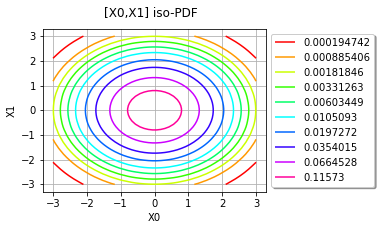

In [3]:
distribution = ot.Normal(2)

graph = distribution.drawPDF([-3.0] * 2, [3.0] * 2, [50] * 2)
view = otv.View(
    graph,
    figure_kw={"figsize": (4.0, 3.0)},
    legend_kw={"bbox_to_anchor": (1.0, 1.0), "loc": "upper left"},
)

## Draw the iso-lines of a function

In [4]:
rosenbrock = ot.SymbolicFunction(["x1", "x2"], ["(1 - x1)^2 + 100*(x2 - x1^2)^2"])
rosenbrock.setName("Rosenbrock")
rosenbrock.setInputDescription([r"$x_1$", r"$x_2$"])
rosenbrock.setOutputDescription(["y"])

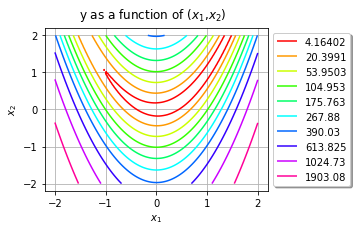

In [5]:
graph = rosenbrock.draw([-2.0] * 2, [2.0] * 2, [100] * 2)
view = otv.View(
    graph,
    figure_kw={"figsize": (4.0, 3.0)},
    legend_kw={"bbox_to_anchor": (1.0, 1.0), "loc": "upper left"},
)

## With Matplotlib

In [6]:
# Compute value of standard deviation on a grid
size = 50
x1list = np.linspace(-2.0, 2.0, size)
x2list = np.linspace(-2.0, 2.0, size)
x1Array, x2Array = np.meshgrid(x1list, x2list)
zArray = np.zeros((size, size))
for i in range(size):  # TODO : vectorize this
    for j in range(size):
        parameters = ot.Point([x1Array[i, j], x2Array[i, j]])
        zArray[i, j] = rosenbrock(parameters)[0]

<Figure size 432x288 with 0 Axes>

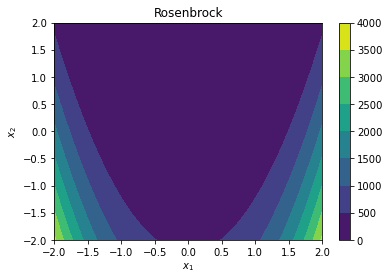

In [7]:
# Plot with default settings
_ = plt.figure()
fig, ax = plt.subplots(1, 1)
cmap = mpl.cm.viridis_r
cp = ax.contourf(x1Array, x2Array, zArray)
_ = fig.colorbar(cp)
_ = ax.set_title("Rosenbrock")
_ = ax.set_xlabel(r"$x_1$")
_ = ax.set_ylabel(r"$x_2$")

In [8]:
# Compute levels
numberOfLevels = 15
zSample = ot.Sample.BuildFromPoint(zArray.flatten())
epsilon_grid = 5.0e-2
regularGrid = np.linspace(epsilon_grid, 1.0 - epsilon_grid, numberOfLevels)
print("regularGrid = ", regularGrid)
levelsSample = zSample.computeQuantile(regularGrid)
levels = [point[0] for point in levelsSample]
print("levels = ", levels)

regularGrid =  [0.05       0.11428571 0.17857143 0.24285714 0.30714286 0.37142857
 0.43571429 0.5        0.56428571 0.62857143 0.69285714 0.75714286
 0.82142857 0.88571429 0.95      ]
levels =  [4.185339441899209, 13.012214521492478, 29.050052725150394, 52.518493006089855, 82.31050837661172, 122.1889074500824, 170.13617650090106, 226.49011006624494, 293.32586212181724, 369.7311145197008, 484.1866002957307, 660.7739690531258, 904.8414608141462, 1294.9116323356163, 1981.500006851927]


<Figure size 432x288 with 0 Axes>

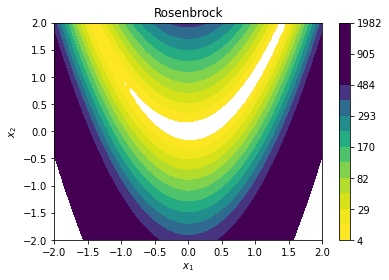

In [9]:
# Plot with customized levels
_ = plt.figure()
fig, ax = plt.subplots(1, 1)
cmap = mpl.cm.viridis_r
cp = ax.contourf(x1Array, x2Array, zArray, levels, cmap=cmap, vmin=10.0, vmax=500.0)
_ = fig.colorbar(cp)
_ = ax.set_title("Rosenbrock")
_ = ax.set_xlabel(r"$x_1$")
_ = ax.set_ylabel(r"$x_2$")

In [10]:
def ComputeMeshGrid2DFunctionValue(
    function, interval, numberOfXCells=100, numberOfYCells=100
):
    """
    Compute the value of the function on a mesh.

    This is handy for contour plots.

    Parameters
    ----------
    function : ot.Function(2, 1)
        The function, which input has dimension 2 and output has dimension 1.
    interval : ot.Interval(2)
        A 2D interval.
    numberOfXCells : int, optional
        The number of cells on the X axis. The default is 100.
    numberOfYCells : int, optional
        The number of cells on the Y axis. The default is 100.

    Raises
    ------
    ValueError
        If the input dimension is not equal to 2 or the output dimension
        is not equal to 1.

    Returns
    -------
    xArray : np.array(numberOfYCells, numberOfXCells)
        The input X array.
    yArray : np.array(numberOfYCells, numberOfXCells)
        The input Y array.
    zArray : np.array(numberOfYCells, numberOfXCells)
        The output array.

    """
    if interval.getDimension() != 2:
        raise ValueError(
            "Dimension of interval is equal "
            "to %d, which is not equal to 2" % (interval.getDimension())
        )
    if function.getInputDimension() != 2:
        raise ValueError(
            "Input dimension of function is equal "
            "to %d, which is not equal to 2" % (function.getInputDimension())
        )
    if function.getOutputDimension() != 1:
        raise ValueError(
            "Output dimension of function is equal "
            "to %d, which is not equal to 1" % (function.getOutputDimension())
        )
    # Create the input mesh
    lowerBound = interval.getLowerBound()
    upperBound = interval.getUpperBound()
    xList = np.linspace(lowerBound[0], upperBound[0], numberOfXCells)
    yList = np.linspace(lowerBound[1], upperBound[1], numberOfYCells)
    xArray, yArray = np.meshgrid(xList, yList)
    # Convert to Sample
    xArrayFlat = xArray.flatten()
    yArrayFlat = yArray.flatten()
    size = numberOfXCells * numberOfYCells
    inputSample = ot.Sample(size, 2)
    inputSample[:, 0] = ot.Sample.BuildFromPoint(xArrayFlat)
    inputSample[:, 1] = ot.Sample.BuildFromPoint(yArrayFlat)
    # Evaluate the function
    zArray = function(inputSample)
    zArray = np.array(zArray)
    zArray = zArray.transpose()
    zArray = np.reshape(zArray, (numberOfYCells, numberOfXCells))
    return xArray, yArray, zArray

In [11]:
# Compute value of standard deviation on a grid
numberOfXCells = 50
numberOfYCells = 25
interval = ot.Interval([-2.0] * 2, [2.0] * 2)
xArray, yArray, zArray = ComputeMeshGrid2DFunctionValue(
    rosenbrock, interval, numberOfXCells=100, numberOfYCells=100
)

<Figure size 432x288 with 0 Axes>

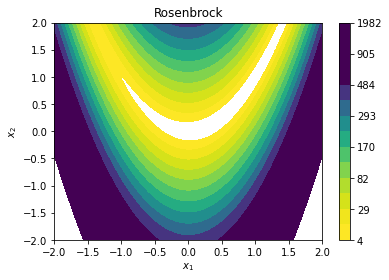

In [12]:
# Plot with customized levels
_ = plt.figure()
fig, ax = plt.subplots(1, 1)
cmap = mpl.cm.viridis_r  # Any colormap has a reversed map, with "_r"
cp = ax.contourf(xArray, yArray, zArray, levels, cmap=cmap, vmin=10.0, vmax=500.0)
_ = fig.colorbar(cp)
_ = ax.set_title("Rosenbrock")
_ = ax.set_xlabel(r"$x_1$")
_ = ax.set_ylabel(r"$x_2$")

In [15]:
def PlotContour(
    function,
    interval,
    numberOfXCells=50,
    numberOfYCells=50,
    numberOfLevels=15,
    epsilonGrid=5.0e-2,
    cmap=mpl.cm.viridis_r,
    addEdges=True,
    edgesColor="k",
    edgesWidth=1.0,
):
    """
    Plot the contours of a function

    Parameters
    ----------
    function : ot.Function(2, 1)
        The function.
    interval : ot.Interval
        The interval.
    numberOfXCells : int, optional
        The number of cells in X axis. The default is 50.
    numberOfYCells : int, optional
        The number of cells in Y axis. The default is 50.
    numberOfLevels : int, optional
        The number of levels to plot. The default is 15.
    epsilon_grid : float > 0.0, optional
        The epsilon on the edges of the level grid. The default is 5.0e-2.
    cmap : colormap, optional
        The colormap. The default is mpl.cm.viridis_r.
    addEdges : bool, optional
        If True, add edges to the plot.
    edgesColor : str, optional
        The color of the edges.
    edgesWidth : float, optional
        The width of the edges.

    Returns
    -------
    fig : Matplotlib.Figure
        The figure.
    ax : Matplotlib.Axes
        The axes.
    cp : Matplotlib.Contour
        The contour.

    """
    xArray, yArray, zArray = ComputeMeshGrid2DFunctionValue(
        function, interval, numberOfXCells, numberOfYCells
    )
    # Compute levels
    zSample = ot.Sample.BuildFromPoint(zArray.flatten())
    regularGrid = np.linspace(epsilonGrid, 1.0 - epsilonGrid, numberOfLevels)
    levelsSample = zSample.computeQuantile(regularGrid)
    levels = [point[0] for point in levelsSample]
    # Plot with customized levels
    _ = plt.figure()
    fig, ax = plt.subplots(1, 1)
    cp = ax.contourf(xArray, yArray, zArray, levels, cmap=cmap)
    _ = fig.colorbar(cp)
    if addEdges:
        plt.contour(
            xArray,
            yArray,
            zArray,
            levels=levels,
            colors=edgesColor,
            linewidths=[edgesWidth],
        )
    return fig, ax, cp

<Figure size 432x288 with 0 Axes>

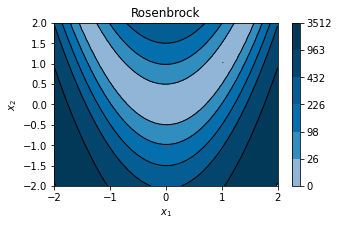

In [16]:
fig, ax, cp = PlotContour(
    rosenbrock, interval, numberOfLevels=7, epsilonGrid=1.0e-3, cmap=mpl.cm.PuBu
)
cp.norm = colors.LogNorm(vmin=0.5, vmax=1000.0)
_ = ax.set_title("Rosenbrock")
_ = ax.set_xlabel(r"$x_1$")
_ = ax.set_ylabel(r"$x_2$")
_ = fig.set_size_inches(5.0, 3.0)